<hr>

# <a id='toc1_'></a>[Deutsch's Algorithm](#toc0_)

<hr>

**Table of contents**<a id='toc1_1_'></a>    
- [Deutsch's Algorithm](#toc1_)    
  - [Table of contents](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [Problem Statement](#toc1_3_)    
    - [Black-Box Problem](#toc1_3_1_)    
    - [Classical Solution](#toc1_3_2_)    
  - [Quantum Principles](#toc1_4_)    
    - [Superpostion](#toc1_4_1_)    
    - [Interference](#toc1_4_2_)    
  - [Deutsch's Algorithm](#toc1_5_)    
    - [Algorithm Explanation](#toc1_5_1_)      
  - [Quantum Circuit Implementation](#toc1_6_)    
    - [Importing Libraries](#toc1_6_1_)    
    - [Initialization](#toc1_6_2_)    
    - [Hadamard Gates:](#toc1_6_2_)    
    - [Oracle Circuit:](#toc1_6_2_)    
    - [Additional Gates:](#toc1_6_2_)    
    - [Measurement:](#toc1_6_3_)    
  - [Circuit Visualization](#toc1_7_)
    - [Visual Representation](#toc1_7_1_)    
  - [Simulating the Quantum Circuit](#toc1_8_)
    - [Setting up the Simulator](#toc1_8_1_)    
    - [Running the Simulation](#toc1_8_2_)    
    - [Results Analysis](#toc1_8_3_)    
  - [Comparative Analysis](#toc1_9_)
    - [Comparison with Classical Approach](#toc1_9_1_)     
  - [Conclusion](#toc1_10_)
    - [Summary of Findings](#toc1_10_1_) 
    - [Significance of Quantum Advantage](#toc1_10_2_) 
  - [Future Directions](#toc1_11_) 
    - [Applications Beyond Deutsch's Algorithm](#toc1_11_1_) 
  - [References](#toc1_12_)    
      - [cl.cam](#toc1_11_1_1_)    
      - [guidotti2018survey](#toc1_11_1_2_)    
      - [zednik2021solving](#toc1_11_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<hr>

## <a id='toc1_2_'></a>[Introduction](#toc0_)

<hr>

### Overview of Quantum Computing
---

IBM defines quantum computing as <q>*a rapidly-emerging tehcnology* that harnesses the laws of quantum mechanics to solve problems **too complex for classical computers.**</q>  
In classical computing, calculations are executed using bits as the fundamental unit of information, where each bit can represent either 0 or 1. In contrast, quantum computers utilize *qubits (quantum bits)*. 

Unlike classical bits, a qubit is not limited to a single, definitive state of 0 or 1; rather, it can exist in multiple states simultaneously. 

This unique property is called *superposition* and allows quantum computers to process a significantly larger number of possibilities than their classical counterparts. 

Qubits exhibit a distinctive characteristic known as *entanglement*, wherein the state of one qubit is intricately linked to the state of another, irrespective of the physical separation between them. This phenomenon, known as entanglement, forms a foundational element in quantum computing. 

Quantum computers harness not only entanglement but also another crucial property known as *interference* to enhance computational efficiency. Through the strategic utilization of entanglement and interference, quantum computers optimize their computational capabilities.

### Why use quantum computing?
---

Despite the growing prevalence of large classical computers equipped with an increasing number of CPU and GPU cores, their fundamental limitation lies in their binary operation. If a supercomputer encounters challenges, it is typically because the **complex problem at hand exceeds the capabilities** of these large classical machines. The failure of classical computers is often rooted in their inherent difficulty handling **high levels of complexity**.

As technology continues to advance, the **complexity of problems also escalates**, necessitating the adoption of *quantum computing*. This heightened complexity underscores the demand for quantum computing solutions. Presently, various fields leverage quantum computing technology to address **intricate challenges**, including but not limited to cryptography, machine learning, and calculations involving large factorial numbers.

### The Deutsch's Algorithm
---

*Deutsch's Algorithm*, formulated by David Deutsch in 1985, is designed to tackle the "black-box problem," a specific computational challenge that will be further examined in the subsequent chapter. In classical computing, discerning whether an unknown function is constant or balanced necessitates multiple queries. In stark contrast, **Deutsch's Algorithm achieves this task with remarkable efficiency, requiring just a single quantum query**. The algorithm adeptly distinguishes between four distinct function types: **constant zero, constant one, balanced zero, and balanced one**. This demonstration highlights the quantum advantage, as it outperforms classical approaches by showcasing the capability of quantum computation to efficiently solve particular problems with a minimal number of queries.

<hr>

## <a id='toc1_3_'></a>[Problem Statement](#toc0_)

<hr>

### <a id='toc1_3_1_'></a>[Black-Box Problem](#toc0_)

As previously stated, the *black-box problem* addressed by **Deutsch's Algorithm** revolves around determining the nature of an *unknown function* encapsulated within a black box. This function takes a *single-bit input* and produces a *single-bit output*. The main challenge is to categorize the function into one of four possible types as seen below. 

<img src="./assets/table1.png" width="200">

- *Constant Function (C0)*: Always returns 0, regardless of the input.
- *Constant Function (C1)*: Always returns 1, regardless of the input.
- *Balanced Function (B0)*: Returns 0 for one input and 1 for the other.
- *Balanced Function (B1)*: Returns 1 for one input and 0 for the other.

The objective is to efficiently determine whether the black-box function falls into the category of a *constant function (either C0 or C1)* or a *balanced function (either B0 or B1)*. Emphasizing these four possible function types, **Deutsch's Algorithm** demonstrates a quantum advantage by solving this problem with just one query, showcasing the potency of quantum computation in specific problem domains.

<hr>

### <a id='toc1_3_2_'></a>[Classical Solution](#toc0_)

In the classical approach to solving the *black-box problem*, the strategy is to make queries to the *unknown function* within the blac-box. Here is how this works:

1. <u>Query for input 0(Classical bit 0):</u> Query the black-box function with an input of 0.
2. <u>Query for input 1(Classical bit 1):</u> Query the black-box function with an input of 1.
3. <u>Compare outputs:</u> Examine the outputs for both queries. If the outputs are the same (both 0 or both 1), the function is classified as "constant." If the outputs are different (one is 0 and the other is 1), the function is classified as "balanced."

The issue with this approach is that this has a few limitations, such as:

- <u>Query complexity:</u> This approach requires at least two queries to the function before it can determine if the function is *constant* or *balanced*. Which leads to the next limitation.

- <u>Scalability issues:</u> As the *complexity of the problem* grows, and with larger input spaces or more intricate functions, the classical approach's query complexity increases linearly. This scalability issue makes the classical solution less efficient for complex problems.

- <u>Inefficiency for Quantum Problems:</u> The *classical approach* contrasts with quantum algorithms like Deutsch's Algorithm, which demonstrate a *quantum advantage* by solving the problem with only one query. The classical method becomes inefficient when compared to quantum solutions for specific problems due to the inherent limitations of sequential query-based approaches.

In the realm of less intricate problems, the *classical approach* remains effective. However, as the complexity of problems escalates or when grappling with quantum scenarios, the classical methodology becomes increasingly impractical. **Quantum problems**, in particular, often surpass the computational capacity of classical approaches, underscoring the need for quantum computing solutions in navigating challenges of heightened intricacy.

<hr>

## <a id='toc1_4_'></a>[Quantum Principles](#toc0_)

<hr>

### <a id='toc1_4_1_'></a>[Superpostion](#toc0_)

**Superposition** is a fundamental quantum principle that allows quantum bits(Qubits) to exist in multiple states simultaneously. Here is how this is defined:

$\text{Superposition} = \alpha|0\rangle + \beta|1\rangle$

- $\alpha \text{ and } \beta$ are complex numbers that determine the *probability* of measuring the qubit in the state $0$ or $1$
- $|0\rangle$ represents the quantum state where the qubit is in the logical state 0.
- $|1\rangle$ represents the quantum state where the qubit is in the logical state 1.

In **superposition**, a qubit is not definitively in state 0 or state 1; instead, it exists as a *combination of both states*. The probabilities $\alpha \text{ and } \beta$ can be djusted, allowing for various degrees of mixing between the two states. When measured, the qubit collapses into one of the basis states (0 or 1) with probabilities determined by $\alpha \text{ and } \beta$

Superposition is a powerful property of qubits that *enables quantum computers to process multiple possibilities simultaneously*, providing a significant advantage over classical bits for certain types of computations.

### <a id='toc1_4_2_'></a>[Interference](#toc0_)

**Interference** in the context of quantum computation refers to the phenomenon where quantum states, such as those of qubits, combine in a way that their amplitudes *reinforce or cancel each other out* when measured.

- **Superposition Sets the Stage:** Interference is intimately tied to the principle of superposition. When a qubit is in superposition, it exists in a combination of multiple states, each associated with a *probability amplitude*.

- **Amplitudes and Probabilities:** The amplitudes of these quantum states are complex numbers, and their magnitudes squared give the probabilities of measuring the qubit in a particular state. For example, in the superposition $\alpha|0\rangle + \beta|1\rangle,\alpha^2$ is the probability of measuring the qubit in state $|0\rangle$, and $\beta^2$ is the probability of measuring it in the state $|1\rangle$.

- **Interference Effects:** Interference occurs when the amplitudes of different quantum states interact. *When two amplitudes have opposite signs, they can cancel each other out **(destructive interference)***, leading to a reduced probability of measuring the qubit in any state. *When two amplitudes have the same sign, they can reinforce each other **(constructive interference)***, increasing the probability of measuring the qubit in a particular state.

- **Quantum Algorithms:** Quantum algorithms, such as *Deutsch's Algorithm* and Grover's Algorithm, leverage interference to perform computations more efficiently than classical counterparts. They manipulate quantum states in a way that *constructive interference enhances the probability of measuring the correct answer while destructive interference reduces the probability of incorrect answers*.

- **Quantum Advantage:** Interference is at the heart of why quantum algorithms can provide significant speedup in solving certain problems. By carefully designing quantum circuits to *exploit interference*, quantum computers can explore multiple solutions simultaneously, leading to faster and more efficient computations.

In conclusion, **superpostion** can be looked at as the initial mix of possibilities, and **interference** is what happens when those possibilities interact, making some outcomes more likely and others less likely. These quantum phenomena are crucial for quantum algorithms to perform computations more efficiently than classical ones.

<hr>

## <a id='toc1_5_'></a>[Deutsch's Algorithm](#toc0_)

<hr>

### <a id='toc1_5_1_'></a>[Algorithm Explanation](#toc0_)

Here is how the **Deutsch's Algorithm** can be described:

- **Initialization:**
    - Prepare two qubits. Set the first qubit to $|0\rangle$ and the second to $|1\rangle$
    - Apply a *Hadamard gate* to both qubits. This transforms the qubits into a *superpostion* of all possible states: $|00\rangle + |01\rangle$, where both are present with equal amplitudes.
- **Oracle Circuit (Black-Box Function):**
    - In this step, we apply the black-box function, often referred to as the oracle, to the qubits. The oracle represents the unknown function we want to evaluate.
    - In the *Oracle function* we evaluate the two qubits as inputs and perform operations on them: $|xy\rangle \rightarrow |x, y \oplus f(x)\rangle$. 

    - In this function, $x \text{ and } y$ represent the two qubits(inputs), $f(x)$ is the function to be evaluated and $\oplus$ is the *XOR operation*, this combines the value of the second qubit $y(q1)$ with the output of the black-box function $f(x)$. This operation flips the second qubit if $f(x)$ is 1 and leaves it unchanged if $f(x)$ is 0.
- **Hadamard Gates Again:**
    - After applying the oracle function, we apply *Hadamard gates* to the first qubit $x(q0)$ again. 
    - The *Hadamard gate* is applied to $q(0)$, creating a superposition of its possible outcomes. 
    This step prepares the system for interference, which is crucial for distinguishing between constant and balanced functions.
- **Measurement:**
    - In this final step, we measure the first qubit. The measurement result is either 0 or 1. The outcome of the measurement provides information about the nature of the black-box function: 
    - If the measurement result is 0, it indicates that the function $f(x)$ is *constant* (either C0 or C1).
    - If the measurement result is 1, it indicates that the function $f(x)$ is *balanced* (either B0 or B1).

The biggest take-away from this is that the  measurement result provides a definitive answer to the problem of determining the type of the black-box function using *only one query*, demonstrating the *quantum advantage* of Deutsch's Algorithm.

<hr>

## <a id='toc1_6_'></a>[Quantum Circuit Implementation](#toc0_)

<hr>

This is a demonstration of the Deutsch's Algorithm using Python.

### <a id='toc1_6_1_'></a>[Importing Libraries](#toc0_)

- For this demonstration I will use the **Qiskit** library. This is a Python library used for *Quantum Computing*. 

In [134]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

### <a id='toc1_6_2_'></a>[Initialization](#toc0_)

- We create a quantum circuit called `circuit`.
- We set up two qubits using `QuantumRegister(2)` named `qreg`. These will be `q[0]` and `q[1]`.
- The one classical bit using `ClassicalRegister(1)` named `creg`. This will be `c[0]`.
- We prepare the second qubit by applying an *X gate* followed by a *Hadamard gate*
- Finally, we define the different oracle functions that can be used to test the algorithm later. 

In [135]:
# Create a quantum circuit with 2 qubits and 1 classical bit
# Qubits q[0] and q[1], and classical bits c[0].
qreg = QuantumRegister(2)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)

# Prepare the second qubit in the state |->.
circuit.x(qreg[1])
circuit.h(qreg[1])

def constant_zero_oracle(circuit, qreg):
    pass # does nothing, represents a constant function that always outputs 0

def constant_one_oracle(circuit, qreg):
    circuit.x(qreg[1]) # flips the target qubit, represents a constant function that always outputs 1

def balanced_oracle(circuit, qreg):
    circuit.cx(qreg[0], qreg[1]) # CNOT gate, a simple balanced function

### <a id='toc1_6_3_'></a>[Hadamard Gates](#toc0_)

- Next we apply **Hadamard gates** (`H`) to the first qubit `q[0]`. This creates a *superposition* of states for the qubit.

In [136]:
# Apply Hadamard gate (H) to the first qubit.
circuit.h(qreg[0])

### <a id='toc1_6_4_'></a>[Oracle Circuit](#toc0_)

- Now we build the **Oracle Circuit** that represents the black-box function. Assuming we have a *balanced function* $f(x)$ that flips the second qubit if the first qubit is set. 

- The `oracle_circuit` function takes the `circuit` and `qreg` as arguments. 
- In this function, we use the *Controlled-X(CNOT) gate* to perform the oracle operation. This gate flips the second qubit(`q[1]`) if the first qubit(`q[0]`) is set.
- Next we can apply the `oracle_circuit` to the qubits to represent the *black-box function* $f(x)$.

- It is important to note that depending on the actual black-box function you want to evaluate, the implementation of the oracle may vary.

Here is the example:

In [137]:
# Using one of the defined functions above 
# Apply the oracle function to the qubits
constant_zero_oracle(circuit, qreg)

### <a id='toc1_6_5_'></a>[Additional Gates](#toc0_)

- After the *oracle function* is applied, we need to apply additional gates to the first qubit (`q[0]`) before measurement. These are essential for *Interference*, which as mentioned, is a key part of the algorithm to distinguish between *constant and balanced functions*. 

In [138]:
# Apply Hadamard gate (H) to the first qubit
circuit.h(qreg[0])

### <a id='toc1_6_6_'></a>[Measurement](#toc0_)

- This is the final step in the Deutsch's Algorithm. Here we add measurement operation to extract the results and determine the nature of the black-box function.
- We use the `measure` method to measure the first qubit(`q[0]`) and store the measurement result in the first classical bit (`c[0]`).

In [139]:
# Step 4: Measurement

# Measure the first qubit (q[0]) and store the result in c[0]
circuit.measure(qreg[0], creg[0])

- The measurement result will be one of the values: ${00, 01, 10, 11}$.
- If the measurement result is 00 or 11, it indicates that $f(x)$ is a *constant function*, (C0 or C1).
- If the measurement result is 01 or 10 it indicates that $f(x)$ is a *balanced function*, (B0 or B1).


<hr>

## <a id='toc1_7_'></a>[Circuit Visualization](#toc0_)

<hr>

### <a id='toc1_7_1_'></a>[Visual Representation](#toc0_)

- In order to visualize the quantum circuit object we can use the `Qiskit's` visualization module. 

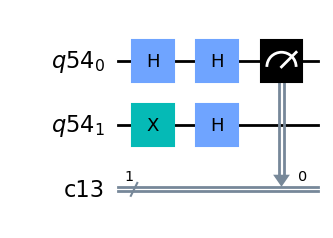

In [140]:
# Import necessary libraries from Qiskit
from qiskit.visualization import circuit_drawer

# Visualize the quantum circuit and display it as a Matplotlib figure
circuit_drawer(circuit, output="mpl")

#### Breakdown

In this representation we can see the following components of the circuit:

- **Qubits** ($q0_0 \text{ and } q0_1$).
- **Gates** (`H`, Oracle($\oplus$) and `H`):
    - The `H` represents the Hadamard gates used to create a *superposition*.
    - The *oracle function* applied to the qubits, which is a custom operation you define in your algorithm. 
- **Lines and Arrows**: 
    - The *lines* connecting the qubits and gates represent the quantum wires or qubits states. 
    - The *arrows* indicate the direction of the quantum operations, showing that the gates are applied to qubits.
- **Classical bits** (`C0`): 
    - C0 is a classical bit abd it stores the measurement results. The label "2/" indicates that it is a 2-bit classical register.
- **Measurement** (`M`): 
    - M represents the measurements performed on the qubits. The outcome is stored in the *classical bits*.
- **Control flow**: 
    - The operations are performed in the order that they appear, from left to right.

<hr>

## <a id='toc1_8_'></a>[Simulating the Quantum Circuit](#toc0_)

<hr>

Next the idea is to simulate the quantum circuit in python, using the Qiskit Aer simulator. This tool provides a fast an accurate way to simulate quantum circuits.

### <a id='toc1_8_1_'></a>[Setting up the Simulator](#toc0_)

- First, we import the `Aer` library from Qiskit for simulating and the `execute` for running the simulations.
- We then choose a suitable simulator that supports *measurements*, `Aer.get_backend('qasm_simulator')`.
- The `num_shots` determines how many times the circuit will run in the simulation. The more shots, the more accurate the results but also it may take longer to simulate. This number can be adjusted as needed. 

In [141]:
# Import necessary libraries from Qiskit
from qiskit import execute, Aer

# Choose the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Set the number of shots (simulated experiments)
num_shots = 1024  # You can adjust this number as needed

### <a id='toc1_8_2_'></a>[Running the Simulation](#toc0_)

- We continue by using the `execute` to run the simulation.
- This uses the `circuit` created previously.
- A `job` uses the `circuit`, the `simulator` and the `shots` to run the simulation.
- We then obtain the results of the simulation, retrieve it and display it. 

In [142]:
# Create a job to run the simulation
job = execute(circuit, simulator, shots=num_shots)

# Get the results of the simulation
results = job.result()

# Retrieve the counts of measurement outcomes
counts = results.get_counts(circuit)

# Display the measurement outcomes and their probabilities
print("Measurement outcomes:", counts)

Measurement outcomes: {'0': 1024}


### <a id='toc1_8_3_'></a>[Results Analysis](#toc0_)

The analysis is the most crucial part of the algorithm, where the nature of the black-box function is determined(*constant or balanced*). 
Here is how we can analyze the results of the simulation:

1. **Retrieve the outcomes:**
    By using `results.get_counts(circuit)` we can obtain the outcomes and then store it in the `counts` variable.
2. **Understanding the outcomes:**
    The outcomes represent the possible states of the qubits after measurement, along with the number of times each outcome was observed. These outcomes are in the form of binary strings, where the first digit represents the measurement result for `q0` and the second digit represnts the measurement result for `q1`. 
3. **Interpretation of the outcomes:**
    As previously seen:
    - If the measurement outcomes contain only the states *00 and 11*, it indicates that the black-box function is **constant**. This means that the oracle function applied to the qubits *does not depend on the input and has a constant output*.
    - If the measurement outcomes contain both *01 and 10*, it indicates that the black-box function is **balanced**. This means that *the oracle function applied to the qubits changes the state of the second qubit based on the input*.
4. **Probability analysis:**
    One of the last steps is to examine the probabilities associated with each measurement outcome. 
    - In a **balanced** function, a roughly equal probability should be observed for `01` and `10` outcomes.
    - In a **constant** function, you should see a higher probability for either `00` or `11`.
5. **Final decision:**
    Once you have the outcomes and probabilities, you can make a final decision regarding the nature of the black-box function. As previously discussed, If you observe only `00` and `11` outcomes, conclude that the function is **constant**. If you observe both `01` and `10` outcomes, conclude that the function is **balanced**.

Here is an example of this analysis:

In [143]:
# Interpretation
if '0' in counts and counts['0'] > counts.get('1', 0):
    print("The black-box function is constant.")
else:
    print("The black-box function is balanced.")

The black-box function is constant.


<hr>

## <a id='toc1_9_'></a>[Comparative Analysis](#toc0_)

<hr>

### <a id='toc1_9_1_'></a>[Comparison with Classical Approach](#toc0_)


<hr>

## <a id='toc1_10_'></a>[Conclusion](#toc0_)

<hr>

### <a id='toc1_10_1_'></a>[Summary of Findings](#toc0_)
### <a id='toc1_10_2_'></a>[Significance of Quantum Advantage](#toc0_)


<hr>

## <a id='toc1_11_'></a>[Future Directions](#toc0_)

<hr>

### <a id='toc1_11_1_'></a>[Applications Beyond Deutsch's Algorithm](#toc0_)


<hr>

## <a id='toc1_12_'></a>[References](#toc0_)

<hr>

#### <a id='toc1_11_1_1_'></a>[cl.cam](#toc0_)
	title	= {Quantum_Computing_Lecture_7},
    URL     = {https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_7.pdf},
    author	= {www.cl.cam.ac.uk},
    dateOfAccess	= {26/10/2023}

#### <a id='toc1_11_1_2_'></a>[guidotti2018survey](#toc0_)
  title={A survey of methods for explaining black box models},
  author={Guidotti, Riccardo and Monreale, Anna and Ruggieri, Salvatore and Turini, Franco and Giannotti, Fosca and Pedreschi, Dino},
  journal={ACM computing surveys (CSUR)},
  volume={51},
  number={5},
  pages={1--42},
  year={2018},
  publisher={ACM New York, NY, USA}

#### <a id='toc1_11_1_3_'></a>[zednik2021solving](#toc0_)
  title={Solving the black box problem: A normative framework for explainable artificial intelligence},
  author={Zednik, Carlos},
  journal={Philosophy \& technology},
  volume={34},
  number={2},
  pages={265--288},
  year={2021},
  publisher={Springer}

Quantum circuits: https://learn.qiskit.org/course/basics/quantum-circuits
Quantum Computing vs Classical Computing: https://devtechnosys.com/insights/tech-comparison/quantum-computing-vs-classical-computing/#:~:text=Classical%20computing%20relies%20on%20binary,This%20is%20known%20as%20superposition.

